In [1]:
import numpy as np
import lifelines
from myfunctions import PlottingLL  
from myfunctions import CoxRegressionModel
from myfunctions import SevenPlot


stime = np.load('stime_eb25_ap25_Mu0.50_Np30_logsp1.npy')
Ne, Na, Nm, Np = 25,25,1,30
ab = 1
ebs = np.linspace(0.,0.7,Ne)
aps = ab*np.linspace(1.,5.,Na)
#print(aps)



/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 210 total observations, 98 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 210
number of events observed = 112
   partial log-likelihood = -469.93
         time fit was run = 2022-04-20 19:45:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
aps        -4.72       0.01       0.41            -5.52            -3.92                 0.00                 0.02

               z      p   -log2(p)
covariate                         
aps       -11.61 <0.005     101.10
---
Concordance = 0.87
Partial AIC = 941.87
log-likelihood ratio test = 184.03 on 1 df
-log2(p) of ll-ratio test = 136.84

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 210 total observations, 98 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 210
number of events observed = 112
   partial log-likelihood = -469.93
         time fit was run = 2022-04-20 19:45:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
aps        -4.72       0.01       0.41            -5.52            -3.92                 0.00                 0.02

               z      p   -log2(p)
covariate                         
aps       -11.61 <0.005     101.10
---
Concordance = 0.87
Partial AIC = 941.87
log-likelihood ratio test = 184.03 on 1 df
-log2(p) of ll-ratio test = 136.84

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 210 total observations, 98 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 210
number of events observed = 112
   partial log-likelihood = -469.93
         time fit was run = 2022-04-20 19:45:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
aps        -4.72       0.01       0.41            -5.52            -3.92                 0.00                 0.02

               z      p   -log2(p)
covariate                         
aps       -11.61 <0.005     101.10
---
Concordance = 0.87
Partial AIC = 941.87
log-likelihood ratio test = 184.03 on 1 df
-log2(p) of ll-ratio test = 136.84

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 210 total observations, 98 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 210
number of events observed = 112
   partial log-likelihood = -469.93
         time fit was run = 2022-04-20 19:45:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
aps        -4.72       0.01       0.41            -5.52            -3.92                 0.00                 0.02

               z      p   -log2(p)
covariate                         
aps       -11.61 <0.005     101.10
---
Concordance = 0.87
Partial AIC = 941.87
log-likelihood ratio test = 184.03 on 1 df
-log2(p) of ll-ratio test = 136.84

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 210 total observations, 98 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 210
number of events observed = 112
   partial log-likelihood = -469.93
         time fit was run = 2022-04-20 19:45:05 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
aps        -4.72       0.01       0.41            -5.52            -3.92                 0.00                 0.02

               z      p   -log2(p)
covariate                         
aps       -11.61 <0.005     101.10
---
Concordance = 0.87
Partial AIC = 941.87
log-likelihood ratio test = 184.03 on 1 df
-log2(p) of ll-ratio test = 136.84

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 210 total observations, 98 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 210
number of events observed = 112
   partial log-likelihood = -469.93
         time fit was run = 2022-04-20 19:45:05 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
aps        -4.72       0.01       0.41            -5.52            -3.92                 0.00                 0.02

               z      p   -log2(p)
covariate                         
aps       -11.61 <0.005     101.10
---
Concordance = 0.87
Partial AIC = 941.87
log-likelihood ratio test = 184.03 on 1 df
-log2(p) of ll-ratio test = 136.84

/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 210 total observations, 98 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 210
number of events observed = 112
   partial log-likelihood = -469.93
         time fit was run = 2022-04-20 19:45:05 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
aps        -4.72       0.01       0.41            -5.52            -3.92                 0.00                 0.02

               z      p   -log2(p)
covariate                         
aps       -11.61 <0.005     101.10
---
Concordance = 0.87
Partial AIC = 941.87
log-likelihood ratio test = 184.03 on 1 df
-log2(p) of ll-ratio test = 136.84

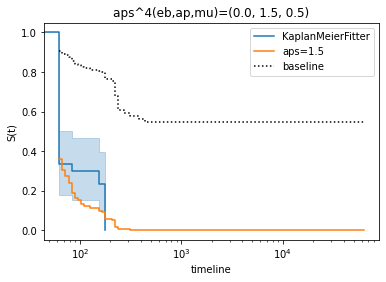

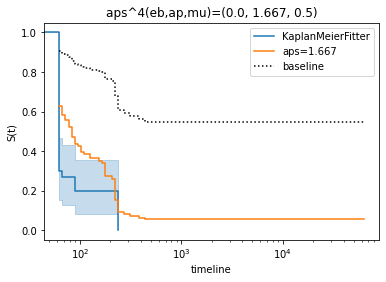

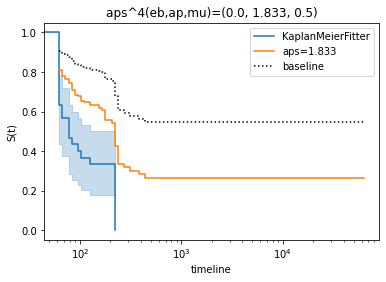

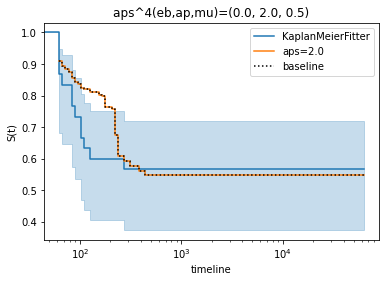

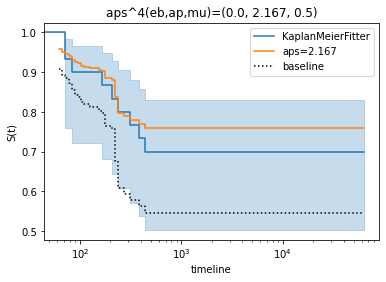

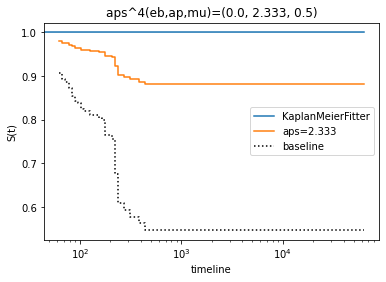

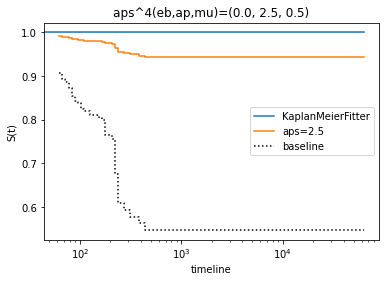

In [2]:
mu = 0.500
ap_s = []
stimes = []

#Plot 1
for x in range(3,10,1):
    #PlottingLL.PlottingLL(np.abs(ebs[0]),aps[x],mu,stime[0,x,:],Np)
    #print(aps[x],stime[0,x,:])
    stimes.append(stime[0,x,:])
    n = 30
    app = [aps[x]]*n
    ap_s.append(app)

    
    
stimes = list(np.concatenate(stimes).flat)
ap_s = list(np.concatenate(ap_s).flat)
#print(stimes)
#print(ap_s)
N = 210
#CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s)

#SevenPlot.SevenPlot(stime,Np,aps)

for x in range(3,10,1):
    CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s,np.abs(ebs[0]),aps[x],mu,stime[0,x,:],Np)



#CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s,np.abs(ebs),aps,mu,stime,Np)


